In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PTDLKD/Data/Platinum_Data.csv')

In [ ]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,06/09/2023,"1,012.80","1,015.40","1,023.60","1,000.20",19.19K,-0.11%
1,06/08/2023,"1,013.90","1,025.00","1,033.00","1,010.90",17.34K,-1.04%
2,06/07/2023,"1,024.60","1,039.40","1,051.80","1,022.30",21.21K,-1.36%
3,06/06/2023,"1,038.70","1,035.50","1,044.30","1,026.60",16.30K,0.22%
4,06/05/2023,"1,036.40","1,007.70","1,043.00","1,006.70",26.56K,2.69%
...,...,...,...,...,...,...,...
1713,12/06/2017,903.55,917.15,917.90,900.10,NaN,-1.49%
1714,12/05/2017,917.25,930.75,931.20,914.85,NaN,-1.46%
1715,12/04/2017,930.85,937.70,938.50,924.45,NaN,-0.75%
1716,12/03/2017,937.85,938.35,939.05,935.90,NaN,-0.36%


# PREPROCESSING DATA

In [ ]:
df = df[['Price']]
# Flip the column
df = df.iloc[::-1]

# Format column Price to float
df['Price'] = df.Price.str.replace(',','').astype(float)

# Drop missing values
df = df.dropna()

# Reset the index
df = df.reset_index(drop=True)

# SPLITTING DATA(7-2-1)

In [ ]:
# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [ ]:
# Training process
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

In [ ]:
# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)
result = model.fit(x_train, y_train)

In [ ]:
# Testing process
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

# Validation process
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(x_val)

In [ ]:
# Create index predict for next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the  prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted  prices for the next 30 days
print('Predicted Platinum prices for the next 30 days:')
print(y_next_30_days)

Predicted Platinum prices for the next 30 days:
[1139.34005199 1139.52759206 1139.71513213 1139.90267221 1140.09021228
 1140.27775236 1140.46529243 1140.65283251 1140.84037258 1141.02791266
 1141.21545273 1141.40299281 1141.59053288 1141.77807296 1141.96561303
 1142.15315311 1142.34069318 1142.52823326 1142.71577333 1142.90331341
 1143.09085348 1143.27839356 1143.46593363 1143.65347371 1143.84101378
 1144.02855386 1144.21609393 1144.40363401 1144.59117408 1144.77871416]


In [ ]:
# Calculate accuracy for each model
from sklearn.metrics import mean_squared_error
test_mse = mean_squared_error(y_test, y_pred)
val_mse = mean_squared_error(y_val, y_pred_val)
test_rmse = np.sqrt(test_mse)
val_rmse = np.sqrt(val_mse)

from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
val_mae = mean_absolute_error(y_val, y_pred_val)


test_ape = np.abs((y_test - y_pred) / y_test)
val_ape = np.abs((y_val - y_pred_val) / y_val)
test_mape = np.mean(test_ape) * 100
val_mape = np.mean(val_ape) * 100

print('Testing RMSE: ', test_rmse)
print('Testing MAE: ', test_mae)
print('Testing MAPE: ', test_mape)
print('Validation RMSE: ', val_rmse)
print('Validation MAE: ', val_mae)
print('Validation MAPE: ', val_mape)

Testing RMSE:  139.78990840915367
Testing MAE:  117.78951511356652
Testing MAPE:  12.861770014262747
Validation RMSE:  111.98084041024809
Validation MAE:  100.6695660760478
Validation MAPE:  10.103646503706962


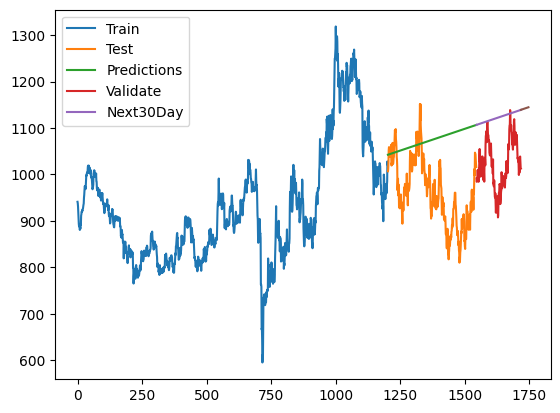

In [ ]:
# Plot
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index,val_data['Price'])
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [ ]:
X = sm.add_constant(df.index)
model_stat = sm.OLS(df['Price'], X)
results = model_stat.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     457.7
Date:                Mon, 19 Jun 2023   Prob (F-statistic):           3.34e-90
Time:                        13:16:14   Log-Likelihood:                -10346.
No. Observations:                1718   AIC:                         2.070e+04
Df Residuals:                    1716   BIC:                         2.071e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        856.3766      4.816    177.830      0.0

# SPLITTING DATA(6-3-1)

In [ ]:
# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [ ]:
# Training process
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)
result = model.fit(x_train, y_train)
# Testing process
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

# Validation process
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(x_val)

# Create index predict for next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted prices for the next 30 days
print('Predicted Platinum prices for the next 30 days:')
print(y_next_30_days)

Predicted Platinum prices for the next 30 days:
[1037.26502782 1037.37801932 1037.49101082 1037.60400232 1037.71699382
 1037.82998532 1037.94297682 1038.05596832 1038.16895982 1038.28195132
 1038.39494282 1038.50793432 1038.62092582 1038.73391732 1038.84690882
 1038.95990032 1039.07289182 1039.18588332 1039.29887482 1039.41186632
 1039.52485782 1039.63784932 1039.75084082 1039.86383232 1039.97682382
 1040.08981532 1040.20280682 1040.31579833 1040.42878983 1040.54178133]


In [ ]:
# Calculate accuracy for each model
from sklearn.metrics import mean_squared_error
test_mse = mean_squared_error(y_test, y_pred)
val_mse = mean_squared_error(y_val, y_pred_val)
test_rmse = np.sqrt(test_mse)
val_rmse = np.sqrt(val_mse)

from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
val_mae = mean_absolute_error(y_val, y_pred_val)


test_ape = np.abs((y_test - y_pred) / y_test)
val_ape = np.abs((y_val - y_pred_val) / y_val)
test_mape = np.mean(test_ape) * 100
val_mape = np.mean(val_ape) * 100

print('Testing RMSE: ', test_rmse)
print('Testing MAE: ', test_mae)
print('Testing MAPE: ', test_mape)
print('Validation RMSE: ', val_rmse)
print('Validation MAE: ', val_mae)
print('Validation MAPE: ', val_mape)

Testing RMSE:  119.49202295434642
Testing MAE:  93.5199748031647
Testing MAPE:  9.071760974323038
Validation RMSE:  49.79081865176379
Validation MAE:  41.06133268107063
Validation MAPE:  4.050064539279466


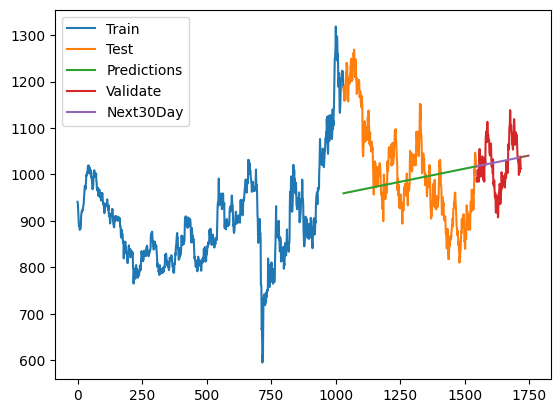

In [ ]:
# Plot
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index,val_data['Price'])
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [ ]:
X = sm.add_constant(df.index)
model_stat = sm.OLS(df['Price'], X)
results = model_stat.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     457.7
Date:                Mon, 19 Jun 2023   Prob (F-statistic):           3.34e-90
Time:                        13:16:15   Log-Likelihood:                -10346.
No. Observations:                1718   AIC:                         2.070e+04
Df Residuals:                    1716   BIC:                         2.071e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        856.3766      4.816    177.830      0.0

# SPLITTING DATA(5-3-2)

In [ ]:
# Split the data into training, testing, and validation sets
train_size = int(0.5 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [ ]:
# Training process
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)
result = model.fit(x_train, y_train)

# Testing process
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

# Validation process
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(x_val)
# Create index predict for next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the Platinum prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted Platinum prices for the next 30 days
print('Predicted Platinum prices for the next 30 days:')
print(y_next_30_days)

Predicted Platinum prices for the next 30 days:
[829.40032098 829.36418872 829.32805647 829.29192421 829.25579196
 829.21965971 829.18352745 829.1473952  829.11126294 829.07513069
 829.03899844 829.00286618 828.96673393 828.93060167 828.89446942
 828.85833717 828.82220491 828.78607266 828.74994041 828.71380815
 828.6776759  828.64154364 828.60541139 828.56927914 828.53314688
 828.49701463 828.46088237 828.42475012 828.38861787 828.35248561]


In [ ]:
# Calculate accuracy for each model
from sklearn.metrics import mean_squared_error
test_mse = mean_squared_error(y_test, y_pred)
val_mse = mean_squared_error(y_val, y_pred_val)
test_rmse = np.sqrt(test_mse)
val_rmse = np.sqrt(val_mse)

from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
val_mae = mean_absolute_error(y_val, y_pred_val)

test_ape = np.abs((y_test - y_pred) / y_test)
val_ape = np.abs((y_val - y_pred_val) / y_val)
test_mape = np.mean(test_ape) * 100
val_mape = np.mean(val_ape) * 100

print('Testing RMSE: ', test_rmse)
print('Testing MAE: ', test_mae)
print('Testing MAPE: ', test_mape)
print('Validation RMSE: ', val_rmse)
print('Validation MAE: ', val_mae)
print('Validation MAPE: ', val_mape)

Testing RMSE:  222.2039122678172
Testing MAE:  195.0491391983289
Testing MAPE:  17.810336547920343
Validation RMSE:  153.92375793836325
Validation MAE:  134.28381873237916
Validation MAPE:  13.340599441622079


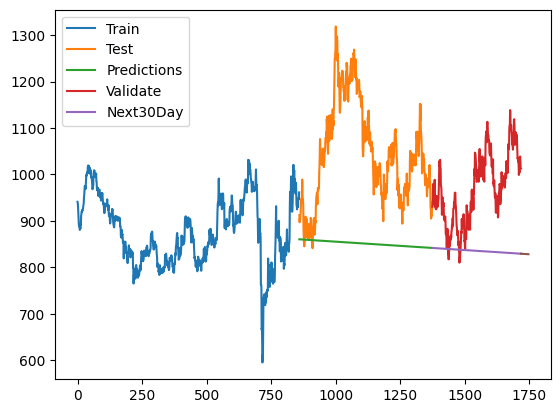

In [ ]:
# Plot
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index,val_data['Price'])
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [ ]:
X = sm.add_constant(df.index)
model_stat = sm.OLS(df['Price'], X)
results = model_stat.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     457.7
Date:                Mon, 19 Jun 2023   Prob (F-statistic):           3.34e-90
Time:                        13:16:17   Log-Likelihood:                -10346.
No. Observations:                1718   AIC:                         2.070e+04
Df Residuals:                    1716   BIC:                         2.071e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        856.3766      4.816    177.830      0.0

# Evaluating Model

---

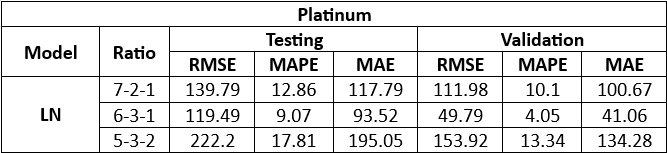